<a href="https://colab.research.google.com/github/Racckso/Portafolio/blob/main/Algorithms/Fraud_detection_using_various_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud data is analyzed using various algorithms such as the perceptron, logistic regression, decision trees, and random forest to determine which is the most effective.**
**

##CARGAR **Bibliotecas**

In [ ]:

# 1.- Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix




In [ ]:

# 2.- Cargar datos desde Google Drive
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Bourbaki/Datos/FRAUDE/FraudeCanastas.csv"
data = pd.read_csv(data_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#Analisis de información



In [ ]:
# 3.- Visualización inicial de los datos
display(data.head())


,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0,1.0
1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0,1.0
2,217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0,1.0
3,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
4,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0,1.0


#Exploracion de datos

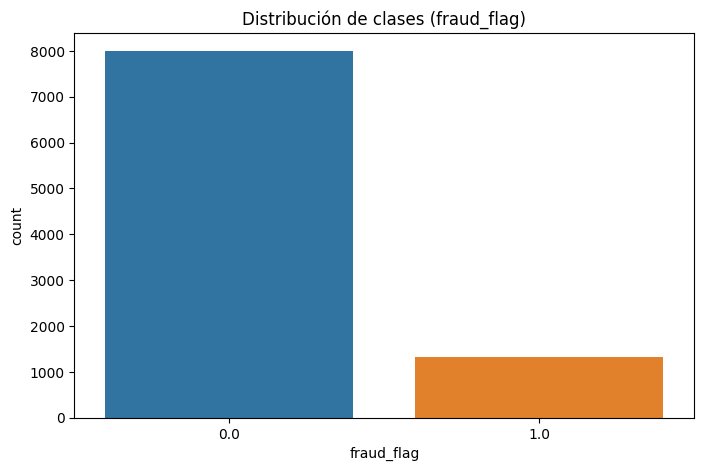

In [ ]:
# 4.- Exploración de Datos: Distribución de clases
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='fraud_flag')
plt.title('Distribución de clases (fraud_flag)')
plt.show()

In [ ]:

#  5.- Estadísticas descriptivas
display(data.describe().transpose().head(10))


,count,mean,std,min,25%,50%,75%,max
ID,9319.0,58763.568409,33714.628042,45.0,29529.0,58489.0,88902.5,115942.0
APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,9319.0,0.107308,10.358941,0.0,0.0,0.0,0.0,1000.0
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,9319.0,0.002146,0.207179,0.0,0.0,0.0,0.0,20.0
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,9319.0,0.305290,7.606907,0.0,0.0,0.0,0.0,500.0
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,9319.0,0.207533,6.133545,0.0,0.0,0.0,0.0,436.0
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,9319.0,0.050971,2.843956,0.0,0.0,0.0,0.0,168.0
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,9319.0,0.014916,1.439893,0.0,0.0,0.0,0.0,139.0
AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,9319.0,0.292521,6.848110,0.0,0.0,0.0,0.0,169.0
AUDIO ACCESSORIES | APPLE | AIRPODS PRO,9319.0,0.230175,6.695964,0.0,0.0,0.0,0.0,195.0
AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,9319.0,0.353471,13.926653,0.0,0.0,0.0,0.0,549.0


In [ ]:

# 7.- Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['fraud_flag', 'ID']))


In [ ]:

# 8.- División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['fraud_flag'], test_size=0.3, random_state=42)


#Modelos a Evaluar

In [ ]:

# 9.- Modelos a evaluar
models = {
    "Perceptron": Perceptron(max_iter=1000, tol=1e-3),
    "Decision Tree (ID3)": DecisionTreeClassifier(criterion='entropy'),
    "Random Forest": RandomForestClassifier(n_estimators=100, criterion='entropy'),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}


#Selección de modelo

In [ ]:

# 10.- Entrenar y evaluar modelos. <<<<<AQUI Me ayuda a elegir  a random forest al tener mejor evaluación>>>>
results = pd.DataFrame(columns=["Accuracy", "Recall", "Precision", "AUC"])
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    results.loc[name] = [accuracy, recall, precision, auc]
display(results)

,Accuracy,Recall,Precision,AUC
Perceptron,0.763948,0.413203,0.286927,0.618625
Decision Tree (ID3),0.881974,0.361858,0.682028,0.666476
Random Forest,0.882690,0.337408,0.707692,0.656764
Logistic Regression,0.873391,0.308068,0.639594,0.639162


In [ ]:


# 11.- Vista del Algoritmo Random Forest y matricez de confusión [Standard]
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_model.fit(X_train, y_train)
y_probs = rf_model.predict_proba(X_test)[:, 1]
y_pred_standard = rf_model.predict(X_test)


#Aqui utilizo el random normal pero me estima mal los que son FRAUDE (prioricé identificar fraude)
confusion_df_standard = pd.DataFrame(confusion_matrix(y_test, y_pred_standard), columns=['Predicted Not Fraud', 'Predicted Fraud'], index=['Actual Not Fraud', 'Actual Fraud'])

display(confusion_df_standard)


,Predicted Not Fraud,Predicted Fraud
Actual Not Fraud,2327,60
Actual Fraud,264,145


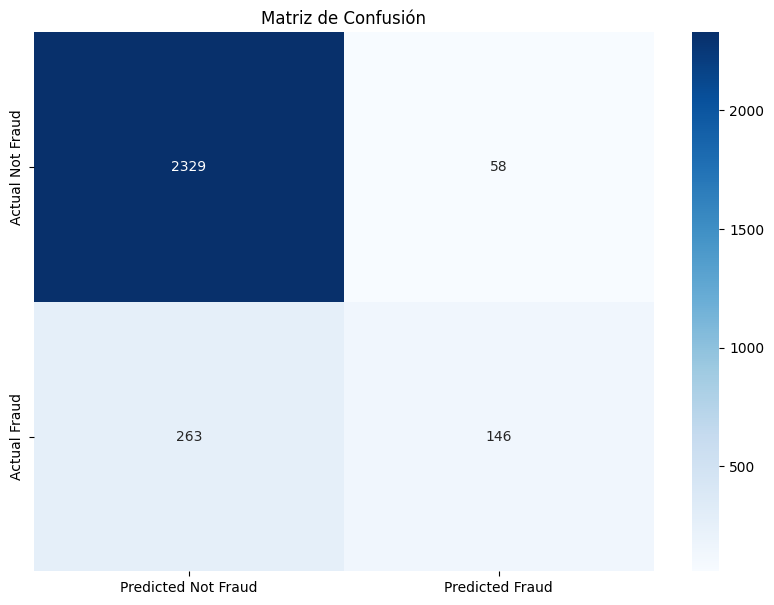

In [ ]:
# Matriz de Cconfusion
plt.figure(figsize=(10,7))
sns.heatmap(confusion_df_standard , annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión')
plt.show()

## Ajuste Random Forest

In [ ]:
# 12 Vista del Algoritmo Random Forest y matricez de confusión [AJUSTADA]
# SE HACE EL AJUSTE PORQUE ME DA RESULTADOS BAJOS EN LA MATRIZ DE FRAUDE y CON ESTO MEJORA
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_model.fit(X_train, y_train)
y_probs = rf_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_probs >= 0.2).astype(int)


confusion_df_adjusted = pd.DataFrame(confusion_matrix(y_test, y_pred_adjusted), columns=['Predicted Not Fraud', 'Predicted Fraud'], index=['Actual Not Fraud', 'Actual Fraud'])

display(confusion_df_adjusted)


,Predicted Not Fraud,Predicted Fraud
Actual Not Fraud,1992,395
Actual Fraud,128,281


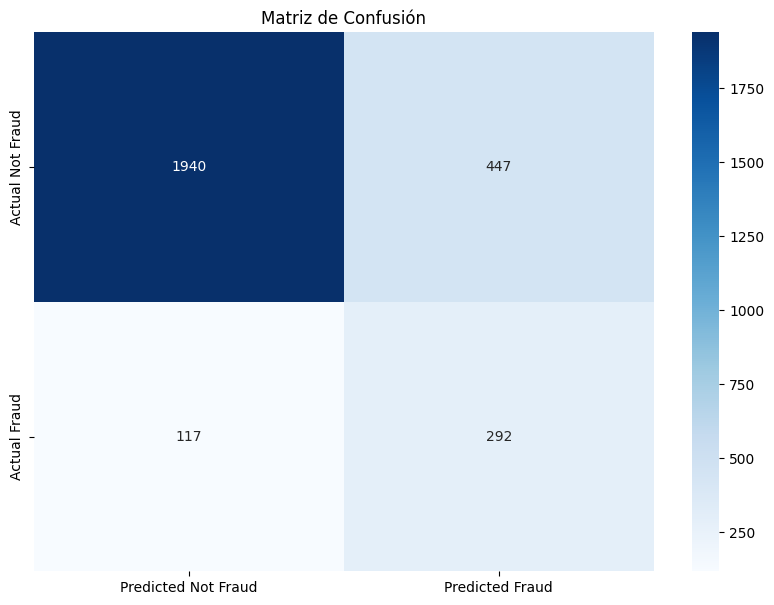

In [ ]:

# Matriz de Cconfusion AJUSTADA
plt.figure(figsize=(10,7))
sns.heatmap(confusion_df_adjusted, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión')
plt.show()

#LA RAZON DEL AJUSTE ES QUE viendo la distribución de clases, tenemos una data sesgada  son mas las predicciones de "No Fraude"
#que las de "sí fraude"